# Praca inżynierska

> Autor: Mateusz Woźniak


Projekt to model uczenia maszynowego, który rozpoznaje typ komórki na podstawie zdjęcia rozmazu szpiku kostnego.

Zbiór danych: https://www.kaggle.com/datasets/andrewmvd/bone-marrow-cell-classification/


In [3]:
import os
import matplotlib.pyplot as plt
import latextable
import texttable

names = {
    'ABE': 'Nieprawidłowy eozynofil',
    'ART': 'Artefakt',
    'BAS': 'Bazofil',
    'BLA': 'Blast',
    'EBO': 'Erytroblast',
    'EOS': 'Eozynofil',
    'FGC': 'Fagocyt',
    'HAC': 'Włochata komórka',
    'KSC': 'Cienie komórkowe',
    'LYI': 'Niedojrzały limfocyt',
    'LYT': 'Limfocyt',
    'MMZ': 'Metamielocyt',
    'MON': 'Monocyt',
    'MYB': 'Mielocyt',
    'NGB': 'Krwinka biała pałeczkowata',
    'NGS': 'Segmentowany neutrofil',
    'NIF': 'Brak rozpoznania',
    'OTH': 'Inna komórka',
    'PEB': 'Proerytroblast',
    'PLM': 'Komórka plazmatyczna',
    'PMO': 'Promielocyt',
}
    

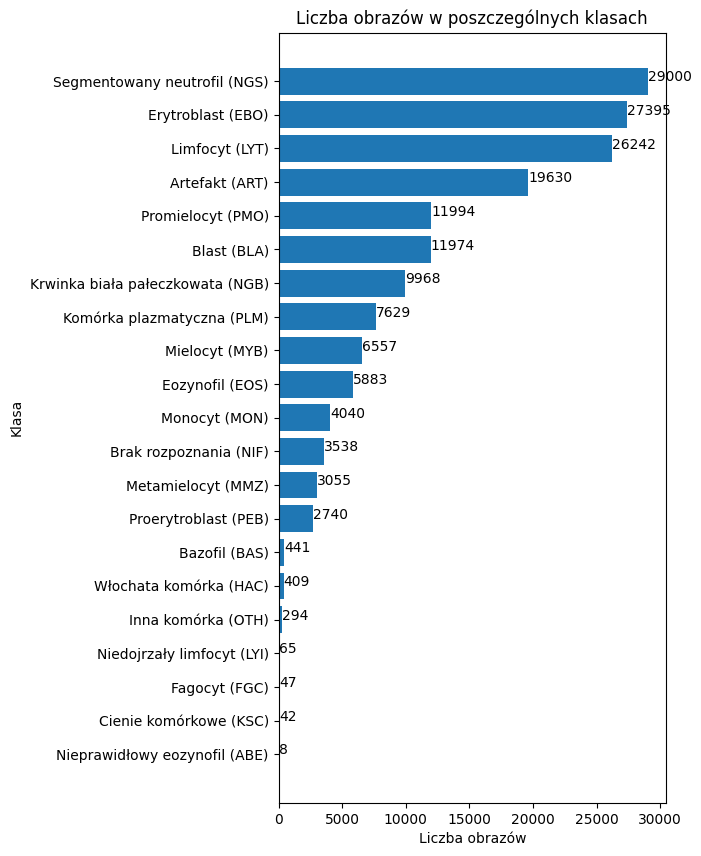

\begin{table}
	\begin{center}
		\begin{tabular}{|l|l|l|}
			\hline
			Klasa & Nazwa & Liczba obrazów \\
			\hline
			NGS & Segmentowany neutrofil & 29000 \\
			\hline
			EBO & Erytroblast & 27395 \\
			\hline
			LYT & Limfocyt & 26242 \\
			\hline
			ART & Artefakt & 19630 \\
			\hline
			PMO & Promielocyt & 11994 \\
			\hline
			BLA & Blast & 11974 \\
			\hline
			NGB & Krwinka biała pałeczkowata & 9968 \\
			\hline
			PLM & Komórka plazmatyczna & 7629 \\
			\hline
			MYB & Mielocyt & 6557 \\
			\hline
			EOS & Eozynofil & 5883 \\
			\hline
			MON & Monocyt & 4040 \\
			\hline
			NIF & Brak rozpoznania & 3538 \\
			\hline
			MMZ & Metamielocyt & 3055 \\
			\hline
			PEB & Proerytroblast & 2740 \\
			\hline
			BAS & Bazofil & 441 \\
			\hline
			HAC & Włochata komórka & 409 \\
			\hline
			OTH & Inna komórka & 294 \\
			\hline
			LYI & Niedojrzały limfocyt & 65 \\
			\hline
			FGC & Fagocyt & 47 \\
			\hline
			KSC & Cienie komórkowe & 42 \\
			\hline
			ABE & Nieprawidłowy eozynofil &

In [4]:
def count_images():
    cwd = os.getcwd()
    dataset_dir = os.path.join(cwd, "dataset")
    subdirs = [d for d in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, d))]
    counts = {}
    for subdir in subdirs:
        subdir_path = os.path.join(dataset_dir, subdir)
        counts[subdir] = sum([len(files) for r, d, files in os.walk(subdir_path)])
        
    return counts

rows = []

def plot_counts(counts):
    key_names = list(map(lambda x: names[x] + ' (' + x + ')', counts.keys()))
    plt.figure(figsize=(5, 10))
    plt.barh(key_names, counts.values())
    for i in range(len(counts)):
        plt.text(list(counts.values())[i], i, str(list(counts.values())[i]))
    plt.title("Liczba obrazów w poszczególnych klasach")
    plt.xlabel("Liczba obrazów")
    plt.ylabel("Klasa")
    plt.savefig("images_count.png", bbox_inches="tight")
    plt.show()

counts = count_images()
counts = {k: v for k, v in sorted(counts.items(), key=lambda item: item[1])}
plot_counts(counts)

rows.append(["Klasa", "Nazwa", "Liczba obrazów"])

for key, value in reversed(counts.items()):
    rows.append([key, names[key], value])

table = texttable.Texttable()
table.add_rows(rows)
print(latextable.draw_latex(table, caption="Klasy obrazów w zbiorze danych", label="tab:images_count"))

UnidentifiedImageError: cannot identify image file 'dataset/BLA/.DS_Store'

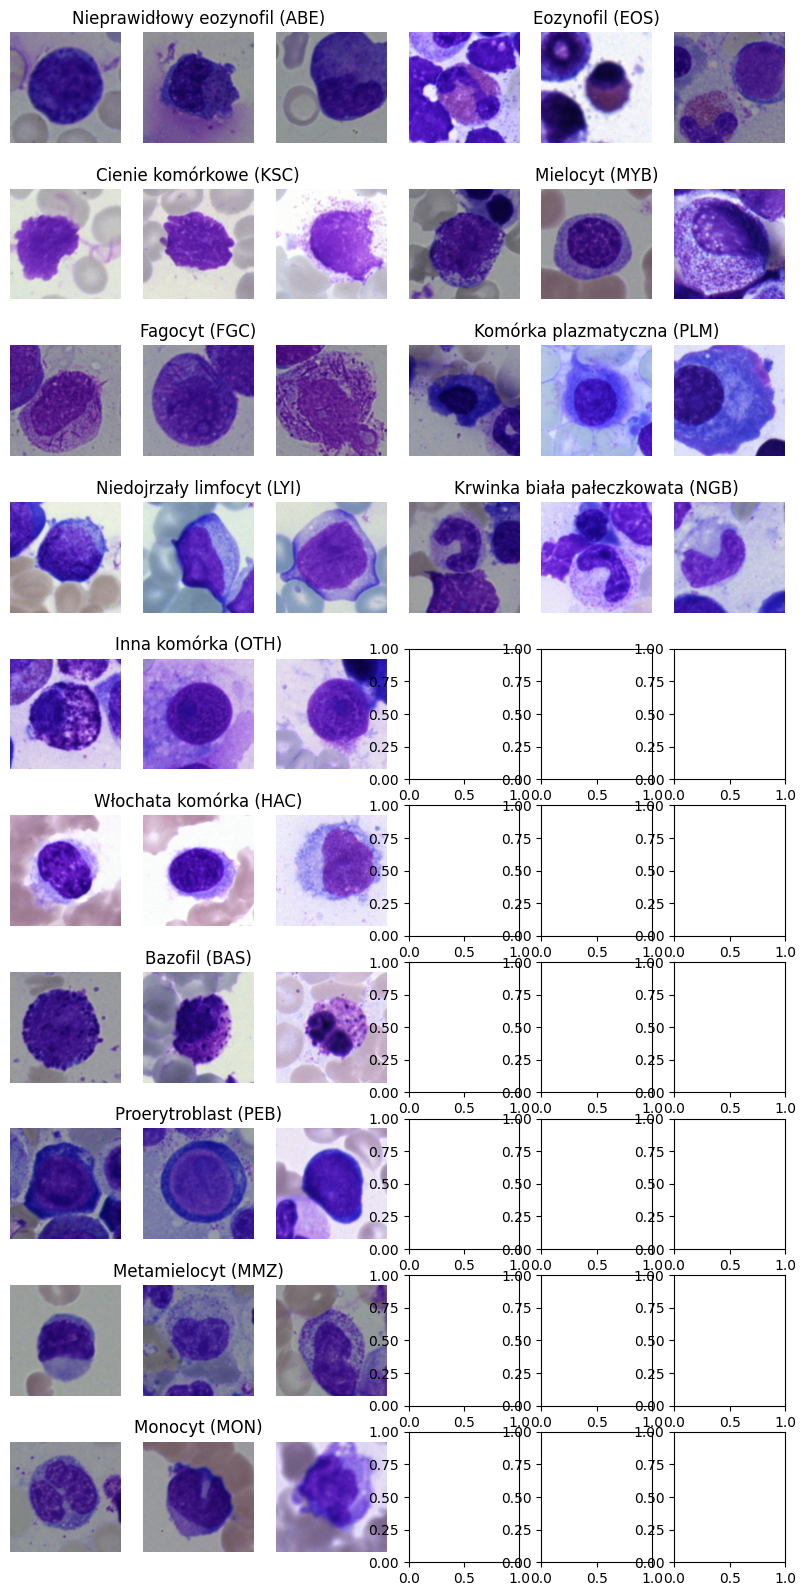

In [5]:
# print(counts)
# fig, ax = plt.subplots(len(counts), 3, figsize=(5, 40))
# for key in counts:
#     filenames = []
#     for r, d, files in os.walk(os.path.join("dataset", key)):
#         for file in files:
#             filenames.append(os.path.join(r, file))
#     for i in range(3):
#         I = plt.imread(filenames[i])
#         ax[list(counts.keys()).index(key), i].imshow(I)
#         ax[list(counts.keys()).index(key), i].axis('off')
#         if i == 0:
#             ax[list(counts.keys()).index(key), i+1].set_title(names[key] + f' ({key})')
# plt.savefig("images_examples.png", bbox_inches="tight")

counts1 = {'ABE': 8, 'KSC': 42, 'FGC': 47, 'LYI': 65, 'OTH': 294,
           'HAC': 409, 'BAS': 441, 'PEB': 2740, 'MMZ': 3055, 'MON': 4040, }
counts2 = {
    'EOS': 5883, 'MYB': 6557, 'PLM': 7629, 'NGB': 9968, 'BLA': 11973, 'PMO': 11994, 'ART': 19630, 'LYT': 26242, 'EBO': 27395, 'NGS': 29000}

fig, ax = plt.subplots(10, 6, figsize=(10, 20))
for key in counts1:
    filenames = []
    for r, d, files in os.walk(os.path.join("dataset", key)):
        for file in files:
            filenames.append(os.path.join(r, file))
    for i in range(3):
        I = plt.imread(filenames[i])
        ax[list(counts1.keys()).index(key), i].imshow(I)
        ax[list(counts1.keys()).index(key), i].axis('off')
        if i == 0:
            ax[list(counts1.keys()).index(key), i +
               1].set_title(names[key] + f' ({key})')
for key in counts2:
    filenames = []
    for r, d, files in os.walk(os.path.join("dataset", key)):
        for file in files:
            filenames.append(os.path.join(r, file))
    for i in range(3):
        I = plt.imread(filenames[i])
        ax[list(counts2.keys()).index(key), i+3].imshow(I)
        ax[list(counts2.keys()).index(key), i+3].axis('off')
        if i == 0:
            ax[list(counts2.keys()).index(key), i+1 +
               3].set_title(names[key] + f' ({key})')
plt.savefig("images_examples.png", bbox_inches="tight")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


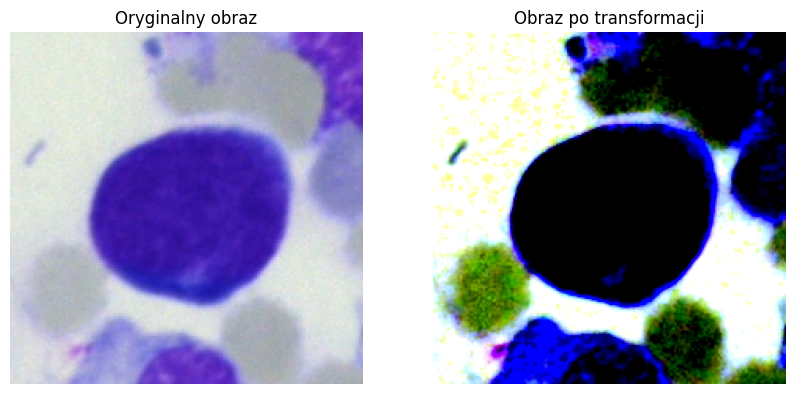

In [ ]:
from torchvision import transforms
import cv2
import PIL
from PIL import Image

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    # transforms.ToPILImage(),
    transforms.RandomEqualize(1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[
        0.229, 0.224, 0.225]),
])

I = cv2.imread("dataset/BLA/0001-1000/BLA_00001.jpg")
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
I = PIL.Image.fromarray(I)
transform(I)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(I, cmap='gray')
ax[0].axis('off')
ax[0].set_title("Oryginalny obraz")
I = transform(I)
I = I.permute(1, 2, 0)
ax[1].imshow(I)
ax[1].axis('off')
ax[1].set_title("Obraz po transformacji")
plt.savefig("image_transform.png", bbox_inches="tight")


In [9]:
rows = [
    ["Architektura", "Ilość parametrów", "Czas treningu", "F1"],
    ["EfficientNet B0", "5.3M", "", "0.86"],
    ["EfficientNet B5", "30M", "", "-"],
]

table = texttable.Texttable()
table.add_rows(rows)
print(latextable.draw_latex(
    table, caption="Porównanie jakości predykcji różnych architektur splotowych sieci neuronowych", label="tab:comparison"))


def print_f1_summary(input):
    rows = []
    rows.append(["Klasa", "Precyzja", "Czułość", "F1", "Liczba próbek"])
    for line in input.split("\n"):
        line = line.strip()
        if line == "":
            continue
        line = line.split()
        rows.append(line)
    table = texttable.Texttable()
    table.add_rows(rows)
    print(latextable.draw_latex(table, caption="Podsumowanie miary F1 dla poszczególnych klas", label="tab:f1_summary"))
    
print_f1_summary("""
         BLA       0.79      0.76      0.78      2446
         EBO       0.96      0.94      0.95      5543
         EOS       0.97      0.96      0.97      1196
         LYT       0.87      0.95      0.91      5211
         MON       0.65      0.68      0.66       812
         MYB       0.85      0.45      0.58      1286
         NGB       0.79      0.72      0.75      2084
         NGS       0.90      0.93      0.92      5818
         PEB       0.66      0.76      0.71       521
         PLM       0.91      0.87      0.89      1494
         PMO       0.77      0.85      0.81      2358""")

\begin{table}
	\begin{center}
		\begin{tabular}{|l|l|l|l|}
			\hline
			Architektura & Ilość parametrów & Czas treningu & F1 \\
			\hline
			EfficientNet B0 & 5.3M &  & 0.860 \\
			\hline
			EfficientNet B5 & 30M &  & - \\
			\hline
		\end{tabular}
	\end{center}
	\caption{Porównanie jakości predykcji różnych architektur splotowych sieci neuronowych}
	\label{tab:comparison}
\end{table}
\begin{table}
	\begin{center}
		\begin{tabular}{|l|l|l|l|l|}
			\hline
			Klasa & Precyzja & Czułość & F1 & Liczba próbek \\
			\hline
			BLA & 0.790 & 0.760 & 0.780 & 2446 \\
			\hline
			EBO & 0.960 & 0.940 & 0.950 & 5543 \\
			\hline
			EOS & 0.970 & 0.960 & 0.970 & 1196 \\
			\hline
			LYT & 0.870 & 0.950 & 0.910 & 5211 \\
			\hline
			MON & 0.650 & 0.680 & 0.660 & 812 \\
			\hline
			MYB & 0.850 & 0.450 & 0.580 & 1286 \\
			\hline
			NGB & 0.790 & 0.720 & 0.750 & 2084 \\
			\hline
			NGS & 0.900 & 0.930 & 0.920 & 5818 \\
			\hline
			PEB & 0.660 & 0.760 & 0.710 & 521 \\
			\hline
			PLM & 0.910 & 0.8

In [ ]:
F